# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy
from datetime import datetime
# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len_city = len(cities)
print(len_city)

598


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
# Save config information.
city_count = 0;
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"
weather_data = []

query_url = f"{url}appid={weather_api_key}&units={units}&q=" 

for city in cities:
    response = requests.get(query_url + city).json()
    city_count+=1;
    try:
        weather_data.append([city, 
                             response['coord']['lat'], response['coord']['lon'], 
                             response['main']['temp_max'], response['main']['humidity'],
                             response['clouds']['all'], response['wind']['speed'], 
                             response['sys']['country'], response['dt']])
        
        print(f'Processing {city}; {city_count} of {len_city}')
        
    except:
        print(f'city number {city_count} not found')
        
# Build partial query URL


Processing hamilton; 1 of 598
Processing ushuaia; 2 of 598
Processing kapaa; 3 of 598
Processing porto santo; 4 of 598
Processing bengkulu; 5 of 598
city number 6 not found
Processing port elizabeth; 7 of 598
Processing tiksi; 8 of 598
Processing aykhal; 9 of 598
Processing alofi; 10 of 598
Processing bara; 11 of 598
Processing barrow; 12 of 598
Processing port blair; 13 of 598
Processing clyde river; 14 of 598
Processing hilo; 15 of 598
Processing vaini; 16 of 598
city number 17 not found
Processing komsomolskiy; 18 of 598
Processing boguchany; 19 of 598
Processing butaritari; 20 of 598
Processing hobart; 21 of 598
Processing hermanus; 22 of 598
Processing geraldton; 23 of 598
Processing lages; 24 of 598
Processing bambous virieux; 25 of 598
Processing ariquemes; 26 of 598
Processing east london; 27 of 598
Processing davila; 28 of 598
Processing yellowknife; 29 of 598
Processing busselton; 30 of 598
city number 31 not found
Processing rikitea; 32 of 598
Processing mantua; 33 of 598
Pr

Processing radishchevo; 263 of 598
Processing kashi; 264 of 598
Processing severo-yeniseyskiy; 265 of 598
Processing gold coast; 266 of 598
Processing oranjestad; 267 of 598
Processing fare; 268 of 598
Processing sosnovo-ozerskoye; 269 of 598
Processing torbay; 270 of 598
Processing mnogovershinnyy; 271 of 598
Processing suhut; 272 of 598
Processing bensonville; 273 of 598
Processing ryotsu; 274 of 598
Processing nouadhibou; 275 of 598
Processing deputatskiy; 276 of 598
Processing rocha; 277 of 598
city number 278 not found
city number 279 not found
Processing bandarbeyla; 280 of 598
Processing knysna; 281 of 598
Processing iquitos; 282 of 598
Processing ponta do sol; 283 of 598
Processing monrovia; 284 of 598
Processing carutapera; 285 of 598
Processing whakatane; 286 of 598
Processing macomer; 287 of 598
Processing ozernovskiy; 288 of 598
Processing bobrovka; 289 of 598
Processing ballina; 290 of 598
Processing ulaangom; 291 of 598
Processing college; 292 of 598
Processing capreol; 2

Processing hofn; 521 of 598
Processing farnham; 522 of 598
Processing linkuva; 523 of 598
Processing stornoway; 524 of 598
Processing laredo; 525 of 598
city number 526 not found
Processing san carlos de bariloche; 527 of 598
Processing kang; 528 of 598
Processing pathein; 529 of 598
Processing puerto del rosario; 530 of 598
Processing zhezkazgan; 531 of 598
Processing orneta; 532 of 598
Processing nuuk; 533 of 598
Processing manokwari; 534 of 598
Processing zabol; 535 of 598
Processing kampong thum; 536 of 598
Processing castro; 537 of 598
Processing ardakan; 538 of 598
Processing sur; 539 of 598
Processing okhotsk; 540 of 598
Processing hun; 541 of 598
Processing rovaniemi; 542 of 598
Processing sao paulo de olivenca; 543 of 598
Processing mancio lima; 544 of 598
Processing dongkan; 545 of 598
Processing san ramon de la nueva oran; 546 of 598
Processing necochea; 547 of 598
Processing conceicao do araguaia; 548 of 598
Processing nkhata bay; 549 of 598
Processing oistins; 550 of 598
P

In [4]:
weather_df = pd.DataFrame(weather_data, columns = ['City','Lat','Lng','Max Temp','Humidity','Cloudiness','Wind Speed','Country', 'Date'])

weather_df

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,hamilton,39.1834,-84.5333,21.47,88,90,2.57,US,1632182653
1,ushuaia,-54.8000,-68.3000,5.81,87,75,3.60,AR,1632182866
2,kapaa,22.0752,-159.3190,28.99,74,90,6.69,US,1632182866
3,porto santo,33.0720,-16.3415,22.21,64,40,6.17,PT,1632182867
4,bengkulu,-3.8004,102.2655,24.54,87,80,1.48,ID,1632182867
...,...,...,...,...,...,...,...,...,...
548,ciudad bolivar,8.1222,-63.5497,27.71,72,100,2.76,VE,1632183087
549,yaan,7.3833,8.5667,23.72,92,99,2.13,NG,1632183087
550,shasta lake,40.6804,-122.3708,33.40,11,0,5.16,US,1632183088
551,gayny,60.3071,54.3241,-1.92,96,13,1.35,RU,1632183088


In [5]:
weather_df.to_csv(output_data_file)

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [6]:
#  Get the indices of cities that have humidity over 100%.
humid_index = weather_df[weather_df['Humidity'] > 100].index.tolist()

print(humid_index)

[]


In [21]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
#data is clean but doing it anyway
clean_city = weather_df.drop(humid_index, inplace=False)
clean_city

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,hamilton,39.1834,-84.5333,21.47,88,90,2.57,US,1632182653
1,ushuaia,-54.8000,-68.3000,5.81,87,75,3.60,AR,1632182866
2,kapaa,22.0752,-159.3190,28.99,74,90,6.69,US,1632182866
3,porto santo,33.0720,-16.3415,22.21,64,40,6.17,PT,1632182867
4,bengkulu,-3.8004,102.2655,24.54,87,80,1.48,ID,1632182867
...,...,...,...,...,...,...,...,...,...
548,ciudad bolivar,8.1222,-63.5497,27.71,72,100,2.76,VE,1632183087
549,yaan,7.3833,8.5667,23.72,92,99,2.13,NG,1632183087
550,shasta lake,40.6804,-122.3708,33.40,11,0,5.16,US,1632183088
551,gayny,60.3071,54.3241,-1.92,96,13,1.35,RU,1632183088


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

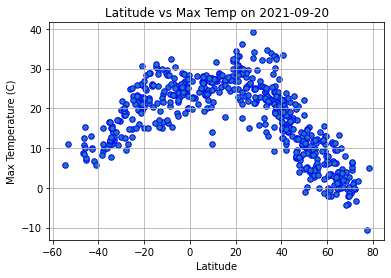

In [8]:
x = weather_df['Lat']
y = weather_df['Max Temp']
plt.scatter(x,y, s=30, edgecolors = 'b')
plt.ylabel('Max Temperature (C)')
plt.xlabel('Latitude')
plt.title(f"Latitude vs Max Temp on {datetime.today().strftime('%Y-%m-%d')}")
plt.grid()
plt.show()


## Latitude vs. Humidity Plot

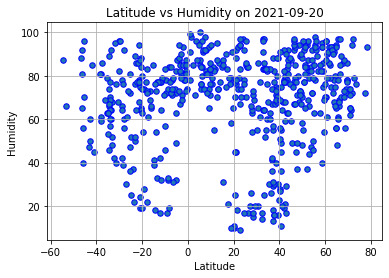

In [9]:
x = weather_df['Lat']
y = weather_df['Humidity']
plt.scatter(x,y, s=30, edgecolors = 'b')
plt.ylabel('Humidity')
plt.xlabel('Latitude')
plt.title(f"Latitude vs Humidity on {datetime.today().strftime('%Y-%m-%d')}")
plt.grid()
plt.show()

## Latitude vs. Cloudiness Plot

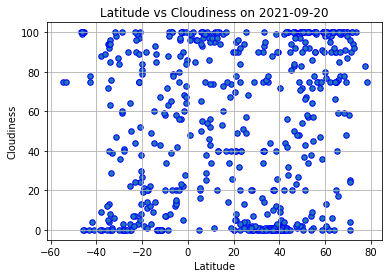

In [10]:
x = weather_df['Lat']
y = weather_df['Cloudiness']
plt.scatter(x,y, s=30, edgecolors = 'b')
plt.ylabel('Cloudiness')
plt.xlabel('Latitude')
plt.title(f"Latitude vs Cloudiness on {datetime.today().strftime('%Y-%m-%d')}")
plt.grid()
plt.show()

## Latitude vs. Wind Speed Plot

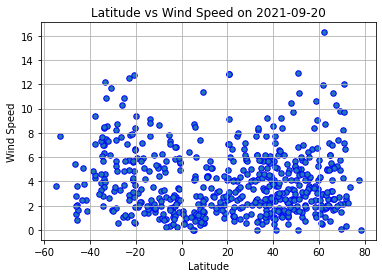

In [11]:
x = weather_df['Lat']
y = weather_df['Wind Speed']
plt.scatter(x,y, s=30, edgecolors = 'b')
plt.ylabel('Wind Speed')
plt.xlabel('Latitude')
plt.title(f"Latitude vs Wind Speed on {datetime.today().strftime('%Y-%m-%d')}")
plt.grid()
plt.show()

## Linear Regression

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

In [12]:
def lin_reg_plot(x,y):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
    regress_values = x * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x,y, s=30, edgecolors = 'b')
    plt.plot(x,regress_values,"r-", label = line_eq)
    plt.legend(loc='best')
    print(f"The r value is: {rvalue}")
    return line_eq



north_df = weather_df.loc[(weather_df['Lat'] >= 0)]
south_df = weather_df.loc[(weather_df['Lat'] < 0)]

The r value is: -0.8281478403429366


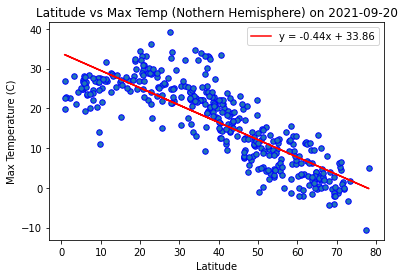

In [13]:
#Call function for regression data
lin_reg_plot(north_df['Lat'],north_df['Max Temp'])
#Add chart text
plt.ylabel('Max Temperature (C)')
plt.xlabel('Latitude')
plt.title(f"Latitude vs Max Temp (Nothern Hemisphere) on {datetime.today().strftime('%Y-%m-%d')}")
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r value is: 0.7722515499474129


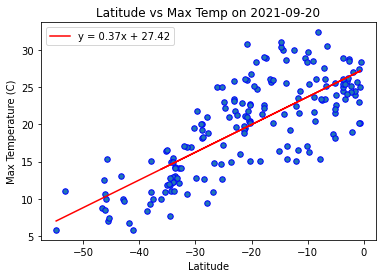

In [14]:
#Call function for regression data
lin_reg_plot(south_df['Lat'],south_df['Max Temp'])
#Add chart text
plt.ylabel('Max Temperature (C)')
plt.xlabel('Latitude')
plt.title(f"Latitude vs Max Temp on {datetime.today().strftime('%Y-%m-%d')}")
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r value is: 0.04691290863342758


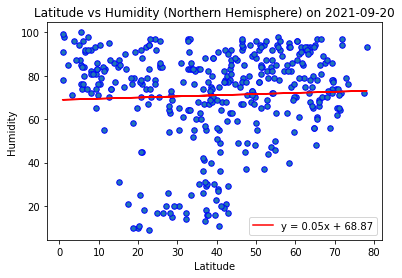

In [15]:
#Call function for regression values
lin_reg_plot(north_df['Lat'],north_df['Humidity'])
#add chart text
plt.ylabel('Humidity')
plt.xlabel('Latitude')
plt.title(f"Latitude vs Humidity (Northern Hemisphere) on {datetime.today().strftime('%Y-%m-%d')}")
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r value is: 0.06569664072386003


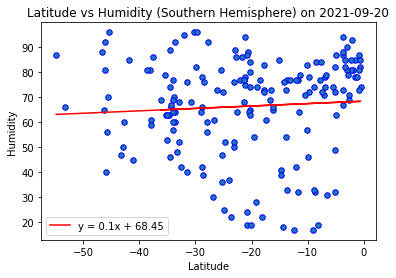

In [16]:
figure = lin_reg_plot(south_df['Lat'],south_df['Humidity'])

plt.ylabel('Humidity')
plt.xlabel('Latitude')
plt.title(f"Latitude vs Humidity (Southern Hemisphere) on {datetime.today().strftime('%Y-%m-%d')}")
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r value is: 0.1436594471023245


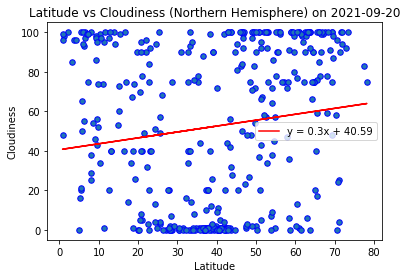

In [17]:
lin_reg_plot(north_df['Lat'],north_df['Cloudiness'])

plt.ylabel('Cloudiness')
plt.xlabel('Latitude')
plt.title(f"Latitude vs Cloudiness (Northern Hemisphere) on {datetime.today().strftime('%Y-%m-%d')}")
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r value is: 0.056440296749697465


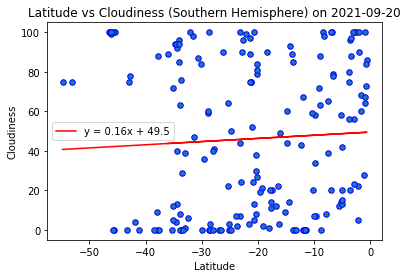

In [18]:
lin_reg_plot(south_df['Lat'],south_df['Cloudiness'])

plt.ylabel('Cloudiness')
plt.xlabel('Latitude')
plt.title(f"Latitude vs Cloudiness (Southern Hemisphere) on {datetime.today().strftime('%Y-%m-%d')}")
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r value is: 0.14745709110184904


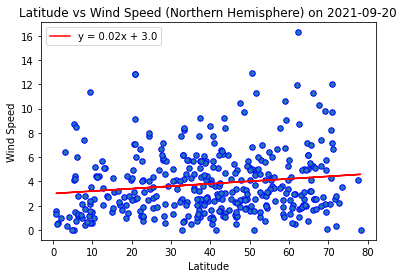

In [19]:
lin_reg_plot(north_df['Lat'],north_df['Wind Speed'])

plt.ylabel('Wind Speed')
plt.xlabel('Latitude')
plt.title(f"Latitude vs Wind Speed (Northern Hemisphere) on {datetime.today().strftime('%Y-%m-%d')}")
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r value is: -0.2094931147859911


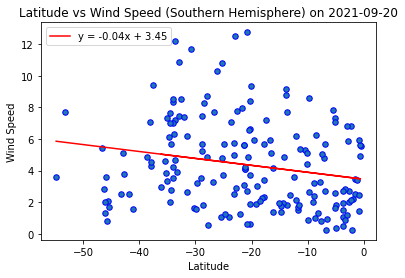

In [20]:
lin_reg_plot(south_df['Lat'],south_df['Wind Speed'])

plt.ylabel('Wind Speed')
plt.xlabel('Latitude')
plt.title(f"Latitude vs Wind Speed (Southern Hemisphere) on {datetime.today().strftime('%Y-%m-%d')}")
plt.show()